In [0]:
 import pandas as pd
 import numpy as np
 import  re
 import tensorflow as tf
 from sklearn.preprocessing  import MinMaxScaler
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.layers import LSTM
 from keras.layers import Dropout
 import matplotlib.pyplot as plt

In [0]:
# Data

# Apple stock data
df = pd.read_csv('https://raw.githubusercontent.com/suitedaces/stock-prediction/master/Apple%20Stock%20Price%20History%20(1%20year).csv?token=AGCPSUSZFA54UPNFH3U6O3C6US7JY', index_col = 'Date')
df.rename(columns = {' Close/Last': 'Close/Last', ' Volume': 'Volume',  ' Open': 'Open', ' High': 'High', ' Low' : 'Low'}, inplace = True)
df[df.columns[0:]] = df[df.columns[0:]].replace('[\$,]', '', regex=True).astype(float)

In [0]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
04/17/2020,282.80,53812480.0,284.69,286.9450,276.8600
04/16/2020,286.69,39281290.0,287.38,288.1975,282.3502
04/15/2020,284.43,32788640.0,282.40,286.3300,280.6300
04/14/2020,287.05,48748670.0,280.00,288.2500,278.0500
04/13/2020,273.25,32755730.0,268.31,273.7000,265.8300


In [0]:
df.info()
df.shape
df.columns.values

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 04/17/2020 to 04/18/2019
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  252 non-null    float64
 1   Volume      252 non-null    float64
 2   Open        252 non-null    float64
 3   High        252 non-null    float64
 4   Low         252 non-null    float64
dtypes: float64(5)
memory usage: 11.8+ KB


array(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype=object)

In [0]:
df_train = df.tail(222)
df_train.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
03/05/2020,292.92,46893220.0,295.52,299.55,291.41
03/04/2020,302.74,54794570.0,296.44,303.40,293.13
03/03/2020,289.32,79868850.0,303.67,304.00,285.80
03/02/2020,298.81,85349340.0,282.28,301.44,277.72
02/28/2020,273.36,106721200.0,257.26,278.41,256.37


In [0]:
df_test = df.head(30)
df_test.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
04/17/2020,282.80,53812480.0,284.69,286.9450,276.8600
04/16/2020,286.69,39281290.0,287.38,288.1975,282.3502
04/15/2020,284.43,32788640.0,282.40,286.3300,280.6300
04/14/2020,287.05,48748670.0,280.00,288.2500,278.0500
04/13/2020,273.25,32755730.0,268.31,273.7000,265.8300


In [0]:
# Data Cleaning
df.isna().any()

# Feature Scaling Normalization

training_set = pd.DataFrame(df_train['Open'])
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train, y_train = [],[]

for i in range(10, 222):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
212/212 [==============================] - 2s 8ms/step - loss: 0.1804
Epoch 2/100
212/212 [==============================] - 0s 884us/step - loss: 0.0416
Epoch 3/100
212/212 [==============================] - 0s 891us/step - loss: 0.0299
Epoch 4/100
212/212 [==============================] - 0s 921us/step - loss: 0.0246
Epoch 5/100
212/212 [==============================] - 0s 898us/step - loss: 0.0133
Epoch 6/100
212/212 [==============================] - 0s 924us/step - loss: 0.0089
Epoch 7/100
212/212 [==============================] - 0s 933us/step - loss: 0.0070
Epoch 8/100
212/212 [==============================] - 0s 997us/step - loss: 0.0080
Epoch 9/100
212/212 [==============================] - 0s 952us/step - loss: 0.0090
Epoch 10/100
212/212 [==============================] - 0s 899us/step - loss: 0.0083
Epoch 11/100
212/212 [==============================] - 0s 884us/step - loss: 0.0068
Epoch 12/100
212/212 [==============================] - 0s 913us/step - loss

In [0]:
test_set = df_test['Open']
df_total = pd.concat((df_train['Open'], df_test['Open']), axis  =  0)
inputs = df_total[len(df_total) -  len(df_test) - 10:].values
inputs = inputs.reshape(-1, 1)
X_test = []
for i in range(10,30):
  X_test.append(inputs[i - 10: i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
real_stock_price = df_test.iloc[:, 0:1].values

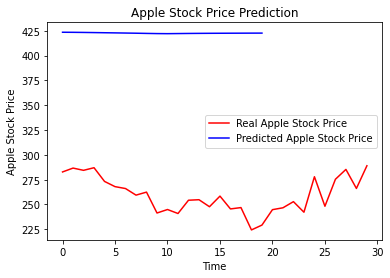

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()